# AMATERASU tutorial

In this notebook, I will briefly explain how AMATERASU works and how to run it.

## What is AMATERASU?

AMATERASU (AutoMATic Equivalent-width Retrieval for Activity Signal Unveiling) is a simple Python tool to check for periods in spectral activity indices similar to an input period. This way, by running AMATERASU for a spectral line, the user can see if the input period may be correlated with activity. It's important to note that AMATERASU follows a methodology similar to the one described in Gomes da Silva et al. 2025 (in prep) and is heavily inspired by ACTIN2.

## How does AMATERASU work?

AMATERASU computes the equivalent width (EW) of a spectral line in a normalization independent way, by using the 90th percentile of the flux in a given window as the continuum level. It computes the EW for an array of bandpasses, going from 0.1 $\AA$ up to a user defined width.

This way, the input includes the spectral line center, bandpass width and a window that includes both the line and some continuum. By default, the flux is interpolated inside the window, with a step similar to the original spectrum's step.

Having retrieved a time series of EWs measurements for a given bandpass, AMATERASU cleans the data by 3-sigma sequential clipping and binning the data by night. 

Finally, AMATERASU runs GLS periodograms (with a bunch of technicalities) and if the significant peak with most power is similar to the tested/input period, the program warns the user.

The user can choose one of the predefined indices in the ``ind_table.csv`` table or define a new indice.

## Caveats and future upgrades

Caveats:
- AMATERASU was tested using NIRPS spectra only, so the predefined indices are NIR lines.
- AMATERASU was only tested with spectral lines that were more or less simmetrical and with a decent depth, so spectral lines like He I 10830 $\AA$ or Paschen $\beta$ were not considered.
- The interpolation included seems to behave weirdly for narrow bandpasses. For example, with a narrow bandpass and ACTIN I could detect Proxima's rotation period, but this is hardly the case in AMATERASU (for K I (c), the rotation period was detected with bandpasses of 0.3 $\AA$ and above). The interpolation method is basically the same as the "new" method in ACTIN2, and not the "true" method.

Future upgrades:
- Code more organized and some more functionalities (similar to ACTIN, e.g. line plots, more user friendly, etc).
- Include option to convert the wavelength to RV space.
- Improve interpolation method.

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from useful_funcs import gather_spectra

from SpecFunc import SpecFunc
SpecFunc = SpecFunc()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

The indice table contains 11 spectral lines predefined: 3 of K I, 3 of Ti I, 2 of Al I, 2 of Mn I and 1 of Fe I. The interpolation windows were defined as double the maximum EW window, but this is not mandatory.

In [3]:
ind_table = pd.read_csv("ind_table.csv")
ind_table

,ln_id,ln_ctr,ln_win,total_win
0,AlIa,13127.011,5.0,10
1,AlIb,13154.345,5.0,10
2,FeI,11693.408,2.5,5
3,KIa,11772.862,2.0,4
4,KIb,12435.647,2.5,5
5,KIc,12525.544,2.5,5
6,MnIa,12903.289,2.5,5
7,MnIb,13322.609,2.0,4
8,TiIa,10498.989,1.5,3
9,TiIb,12825.181,1.5,3


Let's run AMATERASU for the star GJ 581 and the spectral line K I (c). The input period will be a literature rotation period value, the tolerance will be 10% of the aforementioned value and the FAP threshold for detection is 0.1%.

To run AMATERASU I also need to give the files (spectra) paths, the star ID, the name of the activity indice, the path to save some plots, and other parameters that were omitted in this tutorial.

In [4]:
from AMATERASU import AMATERASU

star = "GJ581"
_, files = gather_spectra(star_name=star, instrument="NIRPS",type="2d")

indice = "KIc"

period_test = [141.6,3.5]
ptol = 0.1*period_test[0]
fap_treshold = 0.001

amaterasu = AMATERASU(files, star, period_test, ptol, fap_treshold, indice, folder_path=None)

AMATERASU instance created for GJ581
Computing EWs for 82 spectra.


100%|██████████| 82/82 [00:18<00:00,  4.42it/s]
/home/telmo/Thesis/AMATERASU/AMATERASU.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean = table.apply(pd.to_numeric, errors='ignore')


Computing GLS Periodograms.


 36%|███▌      | 9/25 [00:28<00:52,  3.29s/it]

Bandpass of 0.9 A with period = 139.406 d and FAP 4.698580428721717e-08%


 40%|████      | 10/25 [00:33<00:53,  3.57s/it]

Bandpass of 1.0 A with period = 141.185 d and FAP 4.13995371825544e-09%


 44%|████▍     | 11/25 [00:36<00:47,  3.37s/it]

Bandpass of 1.1 A with period = 144.647 d and FAP 0.002098105414982663%


 48%|████▊     | 12/25 [00:39<00:45,  3.49s/it]

Bandpass of 1.2 A with period = 145.458 d and FAP 0.0010404632702481027%


 52%|█████▏    | 13/25 [00:42<00:38,  3.25s/it]

Bandpass of 1.3 A with period = 144.369 d and FAP 1.1876433721005625e-07%


 56%|█████▌    | 14/25 [00:46<00:37,  3.39s/it]

Bandpass of 1.4 A with period = 144.87 d and FAP 1.283938059666851e-07%


 60%|██████    | 15/25 [00:50<00:35,  3.52s/it]

Bandpass of 1.5 A with period = 145.43 d and FAP 2.943326797727567e-07%


 64%|██████▍   | 16/25 [00:54<00:34,  3.86s/it]

Bandpass of 1.6 A with period = 147.686 d and FAP 0.0002493236191269243%


 68%|██████▊   | 17/25 [00:58<00:29,  3.69s/it]

Bandpass of 1.7 A with period = 146.649 d and FAP 1.6662336154257659e-06%


 72%|███████▏  | 18/25 [01:02<00:26,  3.81s/it]

Bandpass of 1.8 A with period = 146.922 d and FAP 2.289266548891895e-06%


 76%|███████▌  | 19/25 [01:05<00:22,  3.78s/it]

Bandpass of 1.9 A with period = 147.527 d and FAP 3.753536249080916e-06%


 80%|████████  | 20/25 [01:09<00:18,  3.71s/it]

Bandpass of 2.0 A with period = 148.885 d and FAP 8.34575519093288e-05%


 84%|████████▍ | 21/25 [01:13<00:14,  3.73s/it]

Bandpass of 2.1 A with period = 148.093 d and FAP 1.1780713594486172e-05%


 88%|████████▊ | 22/25 [01:17<00:11,  3.98s/it]

Bandpass of 2.2 A with period = 148.006 d and FAP 1.844680882656547e-05%


 92%|█████████▏| 23/25 [01:22<00:08,  4.08s/it]

Bandpass of 2.3 A with period = 147.918 d and FAP 2.7464674864257146e-05%


 96%|█████████▌| 24/25 [01:25<00:03,  3.77s/it]

Bandpass of 2.4 A with period = 148.591 d and FAP 0.00020166102199455617%


100%|██████████| 25/25 [01:28<00:00,  3.55s/it]

Bandpass of 2.5 A with period = 148.415 d and FAP 0.0001435656063877224%


As we can see, K I (c) is able to detect GJ 581's rotation period quite nicely for bandpasses over 0.9 $\AA$. Let's check which bandpasses catched the input period:

In [5]:
AMATERASU.periods_flagged

,bandpass,period,flag_period,fap_best
0,0.9,139.406,3,4.698580e-10
1,1.0,141.185,3,4.139954e-11
2,1.1,144.647,3,2.098105e-05
3,1.2,145.458,3,1.040463e-05
4,1.3,144.369,3,1.187643e-09
5,1.4,144.870,3,1.283938e-09
6,1.5,145.430,3,2.943327e-09
7,1.6,147.686,3,2.493236e-06
8,1.7,146.649,3,1.666234e-08
9,1.8,146.922,3,2.289267e-08


Let's do a nice plot of the GLS periodograms for all bandpasses computed.

100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


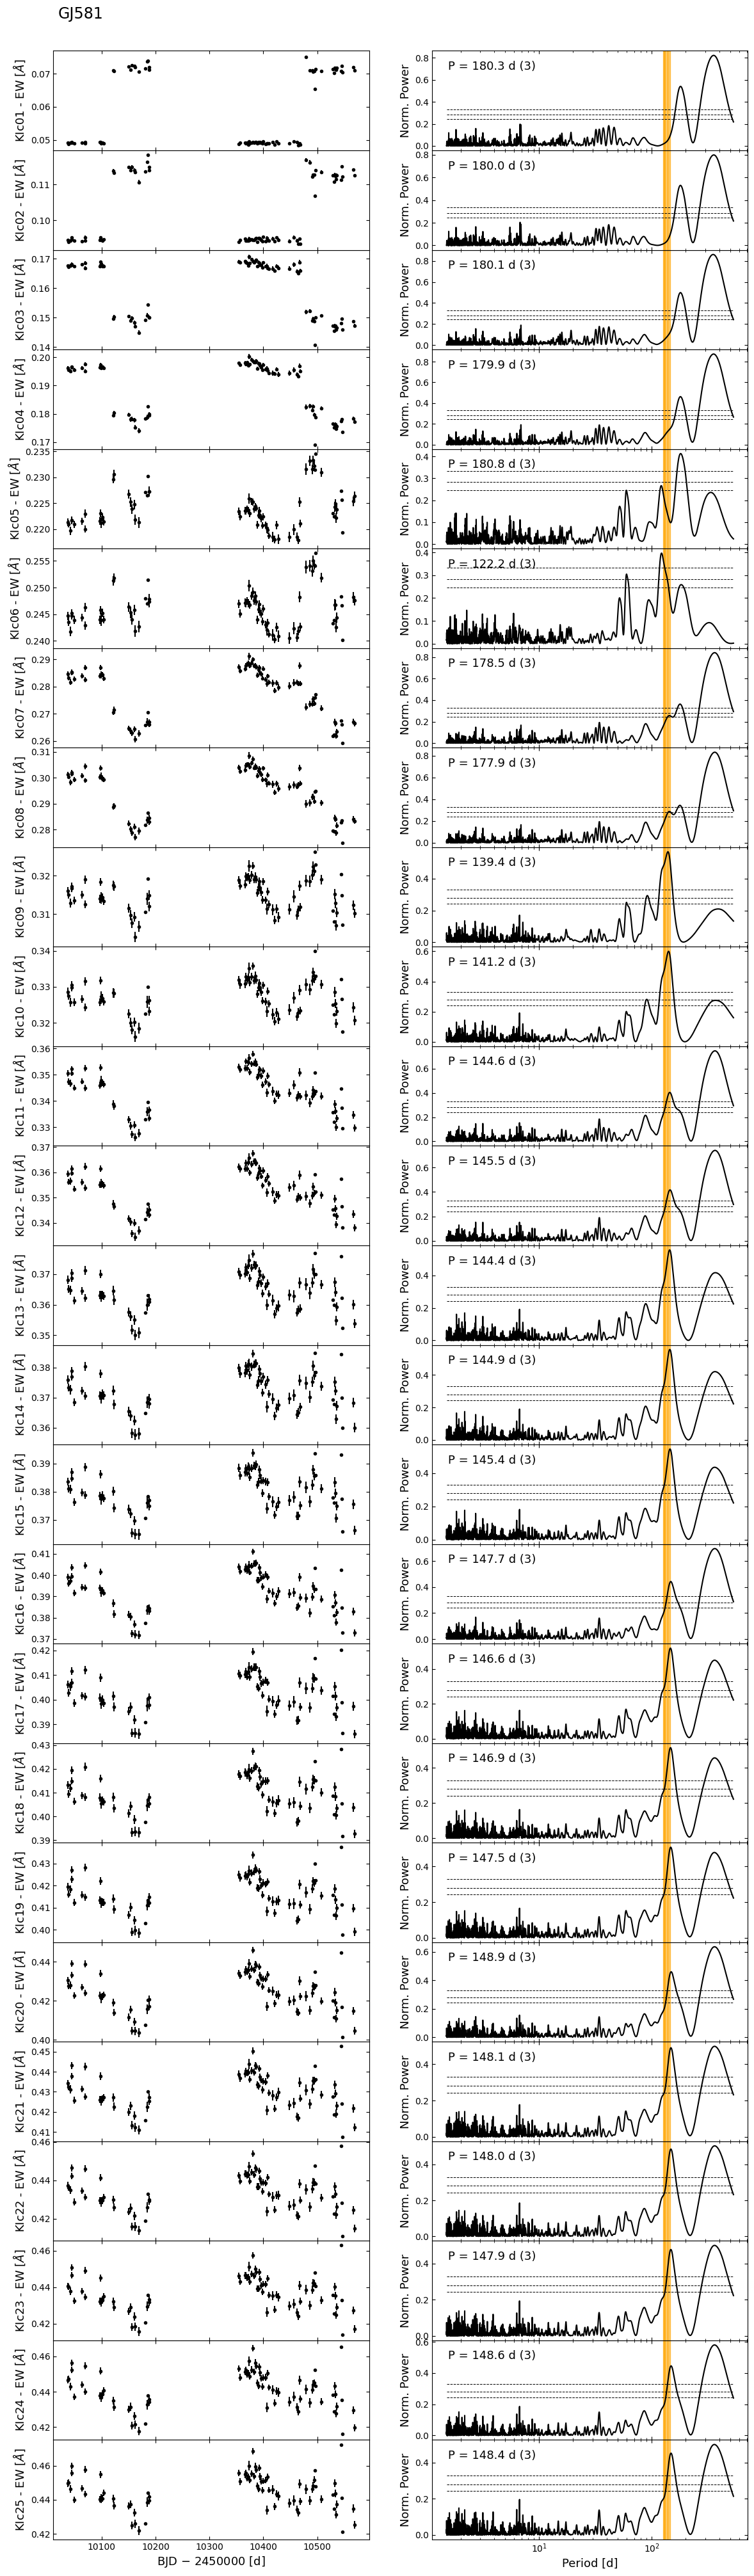

In [6]:
p_rot_lit_list = [[132.5,6.3],[141.6,3.5],[130,2]] #different literature values

AMATERASU.GLS_plot(star, p_rot_lit_list, AMATERASU.cols_names, AMATERASU.EWs, AMATERASU.gls_results_all)

We can also visualize a single spectral line, if we wish.

AMATERASU instance created for GJ581
Computing EWs for 1 spectra.


  0%|          | 0/1 [00:00<?, ?it/s]

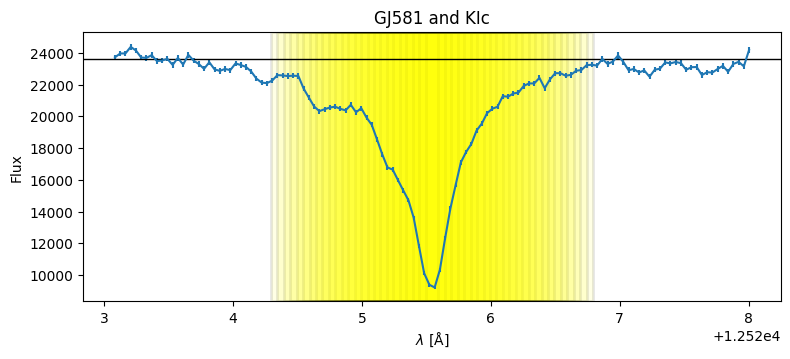

100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
/home/telmo/Thesis/AMATERASU/AMATERASU.py:219: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean = table.apply(pd.to_numeric, errors='ignore')


In [8]:
amaterasu = AMATERASU(files[:1], star, period_test, ptol, fap_treshold, indice, run_gls=False, plot_line=True)